## Exploratory Data Analysis

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# displays floats with 2 decimal points
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# load in dataset
df = pd.read_csv('./cleaned_kchd_V3.csv', index_col=0, parse_dates=['date'])

### First look at the data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,logged_price
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,0,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29


In [4]:
df.iloc[:,:13].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,NO,NO,NONE,Good
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,NO,YES,AVERAGE,Average
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,0,NO,NO,AVERAGE,Average
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,NO,NO,AVERAGE,Average
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,NO,YES,NONE,Average


In [289]:
df.logged_price.value_counts()

13.38    340
13.53    295
13.59    289
13.30    289
13.65    286
        ... 
14.18      1
13.55      1
13.79      1
12.01      1
12.15      1
Name: logged_price, Length: 5071, dtype: int64

In [5]:
df.iloc[:,12:].head()

,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,logged_price
0,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42
1,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73
2,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65
3,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56
4,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  int64         
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [7]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
logged_price      0
dtype: int64

Drop null values from heat source and sewer system

In [8]:
df.dropna(subset=['heat_source', 'sewer_system'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

waterfront, view, and yr_renovated have null values

In [10]:
df['waterfront'].value_counts()

0    29600
1      511
Name: waterfront, dtype: int64

In [11]:
df['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [12]:
df['yr_renovated'].value_counts()

0       28743
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1972        1
1948        1
1942        1
1966        1
Name: yr_renovated, Length: 82, dtype: int64

It's possible a 0 value for yr_renovated means it has not been renovated. This could be useful in our model to see if a renovation has had a significant impact on the house price.

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,logged_price
count,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00,30111.00
mean,4539171422.40,1108970.65,3.42,2.34,2113.34,16648.80,1.54,0.02,1810.39,476.62,330.48,217.45,1975.16,90.79,47.33,-121.32,13.74
std,2882235761.32,896515.83,0.98,0.89,973.45,59933.03,0.57,0.13,877.73,579.81,285.73,245.30,32.05,416.20,1.43,5.72,0.58
min,1000055.00,27360.00,0.00,0.00,3.00,402.00,1.00,0.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79,10.22
25%,2070850032.50,649236.00,3.00,2.00,1420.00,4850.00,1.00,0.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33,13.38
50%,3876000200.00,860000.00,3.00,2.50,1920.00,7477.00,1.50,0.00,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23,13.66
75%,7287100141.00,1300000.00,4.00,3.00,2620.00,10568.00,2.00,0.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12,14.08
max,9904000012.00,30750000.00,13.00,10.50,15360.00,3253932.00,4.00,1.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07,17.24


### Assigning Numbers to Categorical Columns

condition, view, and grade we can assign number values to. This will help with sorting and our regression later on. We are also going to convert yr_renovated into a YES or NO column. So if a house was renovated it will be YES if not it will say NO.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30111 non-null  int64         
 1   date           30111 non-null  datetime64[ns]
 2   price          30111 non-null  float64       
 3   bedrooms       30111 non-null  int64         
 4   bathrooms      30111 non-null  float64       
 5   sqft_living    30111 non-null  int64         
 6   sqft_lot       30111 non-null  int64         
 7   floors         30111 non-null  float64       
 8   waterfront     30111 non-null  int64         
 9   greenbelt      30111 non-null  object        
 10  nuisance       30111 non-null  object        
 11  view           30111 non-null  object        
 12  condition      30111 non-null  object        
 13  grade          30111 non-null  object        
 14  heat_source    30111 non-null  object        
 15  sewer_system   3011

In [15]:
# taking a look at grade
df.grade.value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [16]:
# split grade into a list and assign the first value
# to the grade_num column
df['grade_num'] = df['grade'].str.split().str[0].astype(int)

In [17]:
# take a look at grade_num column
df['grade_num']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: grade_num, Length: 30111, dtype: int32

In [18]:
# check out the final input
df[['grade', 'grade_num']].head(10)

,grade,grade_num
0,7 Average,7
1,7 Average,7
2,7 Average,7
3,9 Better,9
4,7 Average,7
5,7 Average,7
6,9 Better,9
7,8 Good,8
8,8 Good,8
9,8 Good,8


Assigning a number value to grade was successful now assign value to condition.

In [19]:
# taking a look at condition
df.condition.value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

The order for condition it POOR, FAIR, AVERAGE, GOOD, VERY GOOD

In [20]:
# create a dictionary to assign numbers to the values
condition_dict = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

In [21]:
# take a look at condition column
df['condition']

0           Good
1        Average
2        Average
3        Average
4        Average
          ...   
30150       Good
30151    Average
30152    Average
30153    Average
30154    Average
Name: condition, Length: 30111, dtype: object

In [22]:
# create new column and assign to the map of condition using
# the dictionary we created
df['condition_num'] = df['condition'].map(condition_dict)

In [23]:
# check to see if it worked
df[['condition','condition_num']]

,condition,condition_num
0,Good,4
1,Average,3
2,Average,3
3,Average,3
4,Average,3
...,...,...
30150,Good,4
30151,Average,3
30152,Average,3
30153,Average,3


Condition column was assigned a numeric value now it is time to convert view to a numeric value

In [24]:
# taking a look at view
df.view.value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [25]:
# create a dictionary for the view values
view_dict = {
    "NONE": 1,
    "FAIR": 2,
    "AVERAGE": 3,
    "GOOD": 4,
    "EXCELLENT": 5
}

In [26]:
# creating a new view_num column with the values from dict
df['view_num'] = df['view'].map(view_dict)

In [27]:
# check to see if it worked
df[['view', 'view_num']].loc[df['view'] != "NONE"]

,view,view_num
1,AVERAGE,3
2,AVERAGE,3
3,AVERAGE,3
6,AVERAGE,3
9,AVERAGE,3
...,...,...
30098,FAIR,2
30114,AVERAGE,3
30120,AVERAGE,3
30145,AVERAGE,3


Now it is time to convert yr_renovated into a YES or NO column if the home was renovated after 2009

In [28]:
df['yr_renovated_yes_or_no'] = df['yr_renovated'].map(lambda x: 1 if x >= 2010 else 0)

In [29]:
df[['yr_renovated', 'yr_renovated_yes_or_no']].loc[df['yr_renovated'] != 0]

,yr_renovated,yr_renovated_yes_or_no
24,2005,0
36,1995,0
40,2008,0
42,1978,0
51,2015,1
...,...,...
30084,1993,0
30094,2016,1
30105,1988,0
30107,1967,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      30111 non-null  int64         
 1   date                    30111 non-null  datetime64[ns]
 2   price                   30111 non-null  float64       
 3   bedrooms                30111 non-null  int64         
 4   bathrooms               30111 non-null  float64       
 5   sqft_living             30111 non-null  int64         
 6   sqft_lot                30111 non-null  int64         
 7   floors                  30111 non-null  float64       
 8   waterfront              30111 non-null  int64         
 9   greenbelt               30111 non-null  object        
 10  nuisance                30111 non-null  object        
 11  view                    30111 non-null  object        
 12  condition               30111 non-null  object

### Extracting zipcode from address

In [31]:
df['address'].iloc[4]

'2193 Northwest Talus Drive, Issaquah, Washington 98027, United States'

In [32]:
# take the 5 numbers for the zipcode
df['zipcode'] = df.address.str[-20:-15]

In [33]:
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '68106', '98092', '98103',
       '98006', '98136', '98007', '98038', '98057', '98077', '98126',
       '98053', '98039', '98107', '98008', '98155', '98168', '98199',
       '98004', '98045', '98052', '98011', '98002', '98033', '98116',
       '08360', '98198', '98125', '98001', '62859', '98112', '98034',
       '98056', '98059', '98005', '98040', '98014', '98106', '98029',
       '98122', '98003', '98117', '98042', '98119', '98065', '98022',
       '98072', '98058', '98108', '98115', '98074', '98105', '98024',
       '07087', '98146', '11704', '68123', '98109', '98102', '52405',
       '02066', '80501', '91343', '19131', '98028', '98188', '55417',
       '98177', '98075', '98010', '98148', '53158', '98047', '15120',
       '98032', '97210', '98070', '11105', '91730', '68410', '58490',
       '68048', '62703', '68601', '61108', '96816', '47060', '48503',
       '55901', '117

In [34]:
df.loc[df['address'].str.contains(', Washington')]['address'].iloc[0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [35]:
df.loc[df['address'].str.contains('Washington 98')]['zipcode'].value_counts()

98042    992
98038    857
98103    761
98115    760
98117    748
        ... 
98338      2
98422      1
98270      1
98296      1
98387      1
Name: zipcode, Length: 88, dtype: int64

Load in Excel file containing King County zipcodes

In [36]:
zipcodes = pd.read_excel('./data/kc_zipcodes.xlsx')
zipcodes.zipcode.astype(str)

0      98001
1      98002
2      98003
3      98004
4      98005
       ...  
115    98195
116    98198
117    98199
118    98224
119    98288
Name: zipcode, Length: 120, dtype: object

In [37]:
zipcode_list = zipcodes.zipcode.astype(str)
zipcode_list

0      98001
1      98002
2      98003
3      98004
4      98005
       ...  
115    98195
116    98198
117    98199
118    98224
119    98288
Name: zipcode, Length: 120, dtype: object

In [38]:
# filter df by king county zipcodes and save the new df
df = df.loc[df['zipcode'].isin(zipcode_list)].copy()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 30154
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      29149 non-null  int64         
 1   date                    29149 non-null  datetime64[ns]
 2   price                   29149 non-null  float64       
 3   bedrooms                29149 non-null  int64         
 4   bathrooms               29149 non-null  float64       
 5   sqft_living             29149 non-null  int64         
 6   sqft_lot                29149 non-null  int64         
 7   floors                  29149 non-null  float64       
 8   waterfront              29149 non-null  int64         
 9   greenbelt               29149 non-null  object        
 10  nuisance                29149 non-null  object        
 11  view                    29149 non-null  object        
 12  condition               29149 non-null  object

## Exploratory Data Analysis

<AxesSubplot:xlabel='view', ylabel='price'>

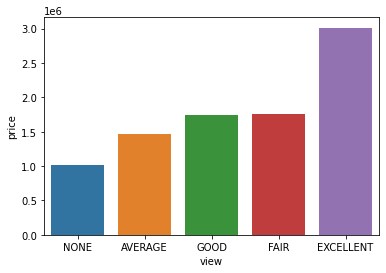

In [40]:
# Drop Null values from view column
view_price = df.dropna(subset=['view'])[['price','view']].groupby(by='view').mean().sort_values(by='price')

sns.barplot(data=view_price.reset_index(), x='view', y='price')

<AxesSubplot:xlabel='grade', ylabel='price'>

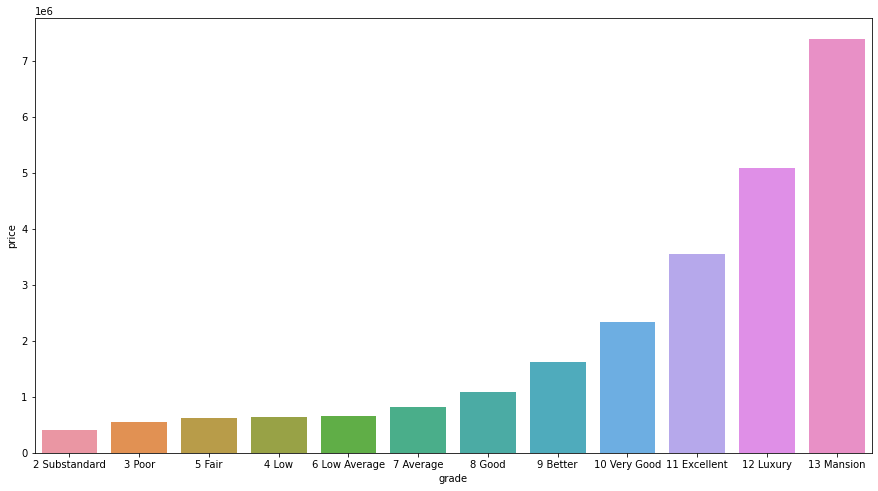

In [41]:
grade_price = df[['price','grade']].groupby(by='grade').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=grade_price, x='grade', y='price', ax=ax)

<AxesSubplot:xlabel='condition', ylabel='price'>

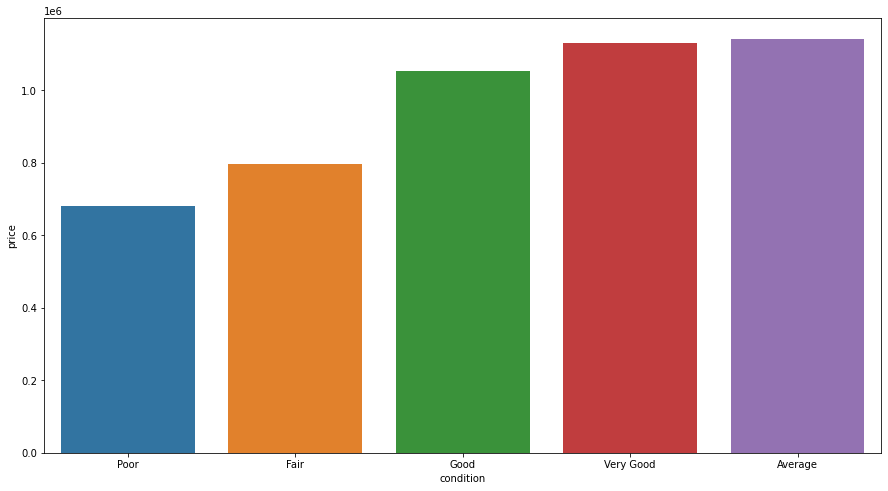

In [42]:
condition_price = df[['price','condition']].groupby(by='condition').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(data=condition_price, x='condition', y='price', ax=ax)

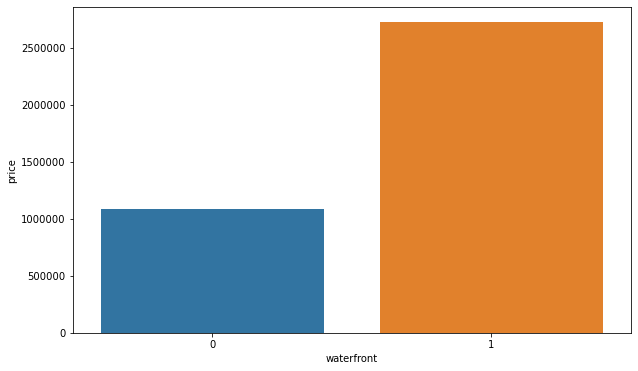

In [43]:
waterfront_price = df[['price','waterfront']].groupby(by='waterfront').mean().sort_values(by='price').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_price, x='waterfront', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

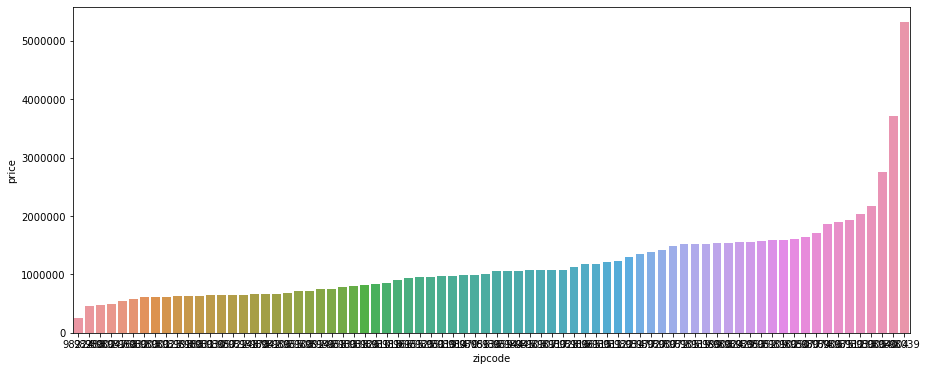

In [44]:
# top 10 zipcodes by average price
zipcode_price = df[['price','zipcode']].groupby(by='zipcode').mean().reset_index().sort_values(by='price')\


fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=zipcode_price, x='zipcode', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

Now I'll look at relationships of variables with scatter plots

In [45]:
df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no
0,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,1180,0,0,40,1969,0,13.42,7,4,1,0
1,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,1570,1570,0,240,1950,0,13.73,7,3,3,0
2,2021-09-29,311000.00,6,2.00,2880,6156,1.00,0,1580,1580,0,0,1956,0,12.65,7,3,3,0
3,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,1090,1070,200,270,2010,0,13.56,9,3,3,0
4,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,1120,550,550,30,2012,0,13.29,7,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2021-11-30,1555000.00,5,2.00,1910,4000,1.50,0,1600,1130,0,210,1921,0,14.26,8,4,1,0
30151,2021-06-16,1313000.00,3,2.00,2020,5800,2.00,0,2020,0,0,520,2011,0,14.09,7,3,2,0
30152,2022-05-27,800000.00,3,2.00,1620,3600,1.00,0,940,920,240,110,1995,0,13.59,7,3,1,0
30153,2022-02-24,775000.00,3,2.50,2570,2889,2.00,0,1830,740,480,100,2006,0,13.56,8,3,1,0


In [46]:
# pair plots in seaborn
# sns.pairplot(data=df.select_dtypes(exclude='object').drop(columns=['id', 'lat','long']))

### Square Foot of Living Across Conditional Variables

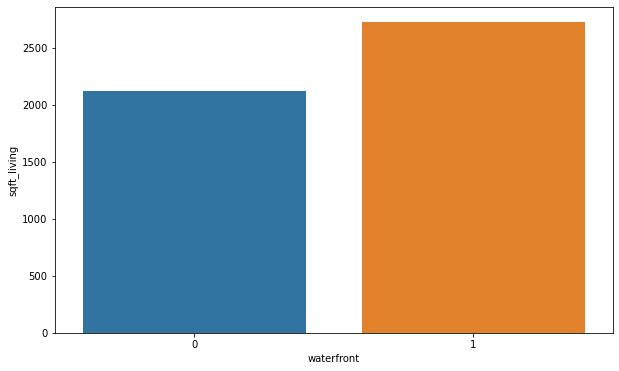

In [47]:
# average square foot of waterfront homes
waterfront_sqft = df[['sqft_living','waterfront']].groupby(by='waterfront')\
.mean().sort_values(by='sqft_living').reset_index()

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=waterfront_sqft, x='waterfront', y='sqft_living', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

<AxesSubplot:xlabel='view', ylabel='sqft_living'>

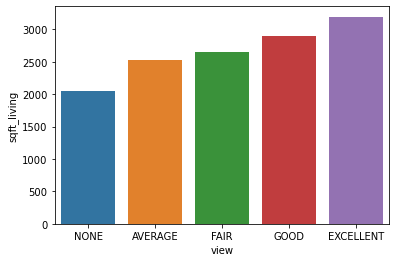

In [48]:
# Average square foot by view
view_sqft = df[['sqft_living', 'view']].groupby(by='view').mean().reset_index().\
sort_values(by='sqft_living')

sns.barplot(data=view_sqft, x='view', y='sqft_living')

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

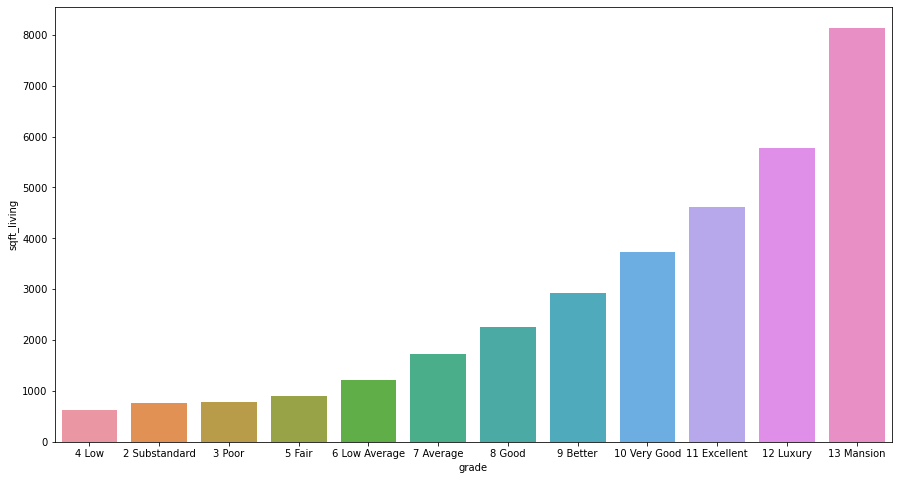

In [49]:
# Average square foot by grade
sqft_grade = df[['sqft_living', 'grade']].groupby(by='grade').mean().\
reset_index().sort_values(by='sqft_living')

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

<AxesSubplot:xlabel='grade', ylabel='sqft_living'>

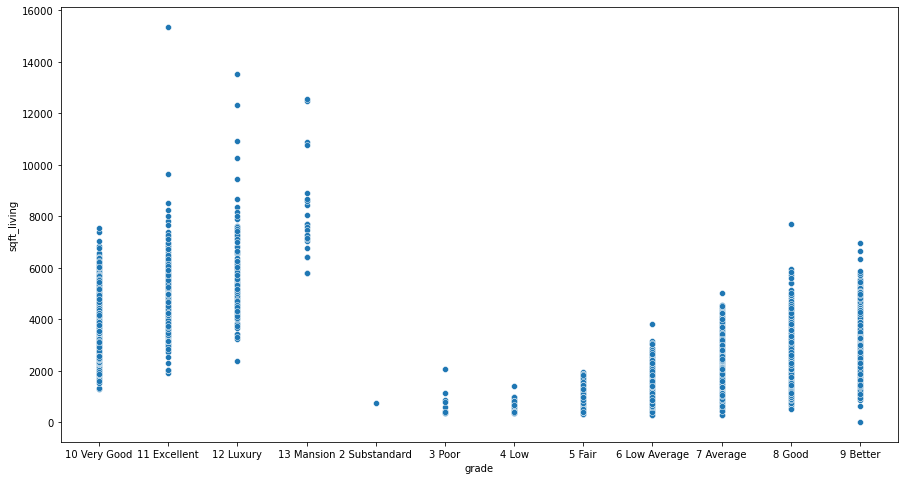

In [50]:
# Scatter plot average square foot and grade
sqft_grade = df[['sqft_living', 'grade']].sort_values(by='grade')

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=sqft_grade, x='grade', y='sqft_living', ax=ax)

In [51]:
df.describe().price

count      29149.00
mean     1113428.96
std       895860.33
min        27360.00
25%       645000.00
50%       869000.00
75%      1310000.00
max     30750000.00
Name: price, dtype: float64

## Simple Linear Regression

In [52]:
# correlation table
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,sqft_patio,yr_built,yr_renovated,lat,long,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no
id,1.00,-0.03,-0.01,-0.01,-0.03,-0.12,0.03,-0.04,-0.02,-0.02,...,-0.04,0.02,-0.03,-0.00,0.01,-0.02,0.00,-0.01,-0.01,-0.01
price,-0.03,1.00,0.29,0.49,0.62,0.09,0.20,0.24,0.55,0.25,...,0.32,0.11,0.09,0.30,0.08,0.83,0.58,-0.01,0.32,0.04
bedrooms,-0.01,0.29,1.00,0.59,0.63,0.00,0.20,-0.03,0.54,0.23,...,0.19,0.18,0.01,-0.02,0.13,0.35,0.39,0.02,0.05,0.02
bathrooms,-0.01,0.49,0.59,1.00,0.78,0.04,0.43,0.05,0.68,0.26,...,0.33,0.46,0.04,0.05,0.18,0.52,0.65,-0.07,0.16,0.03
sqft_living,-0.03,0.62,0.63,0.78,1.00,0.12,0.36,0.08,0.88,0.34,...,0.41,0.33,0.04,0.05,0.23,0.62,0.74,-0.07,0.24,0.01
sqft_lot,-0.12,0.09,0.00,0.04,0.12,1.00,-0.02,0.08,0.13,0.00,...,0.16,0.01,0.01,-0.07,0.18,0.08,0.06,-0.00,0.10,-0.00
floors,0.03,0.20,0.20,0.43,0.36,-0.02,1.00,0.00,0.51,-0.24,...,0.12,0.52,-0.02,0.05,0.09,0.26,0.47,-0.27,0.01,-0.04
waterfront,-0.04,0.24,-0.03,0.05,0.08,0.08,0.00,1.00,0.06,0.05,...,0.13,-0.04,0.10,-0.04,0.03,0.14,0.05,0.00,0.42,0.01
sqft_above,-0.02,0.55,0.54,0.68,0.88,0.13,0.51,0.06,1.00,-0.07,...,0.32,0.43,0.01,-0.02,0.34,0.55,0.72,-0.15,0.13,-0.02
sqft_basement,-0.02,0.25,0.23,0.26,0.34,0.00,-0.24,0.05,-0.07,1.00,...,0.21,-0.23,0.05,0.19,-0.22,0.25,0.14,0.09,0.27,0.04


In [53]:
# correlated to price
df.corr().price.sort_values()

id                       -0.03
condition_num            -0.01
yr_renovated_yes_or_no    0.04
long                      0.08
yr_renovated              0.09
sqft_lot                  0.09
yr_built                  0.11
floors                    0.20
waterfront                0.24
sqft_basement             0.25
sqft_garage               0.27
bedrooms                  0.29
lat                       0.30
sqft_patio                0.32
view_num                  0.32
bathrooms                 0.49
sqft_above                0.55
grade_num                 0.58
sqft_living               0.62
logged_price              0.83
price                     1.00
Name: price, dtype: float64

Most correlated variables to price are sqft_living, grade_num, sqft_above, bathrooms, sqft_patio, and view_num.

For our simple linear regression we are going to use sqft_living to predict price

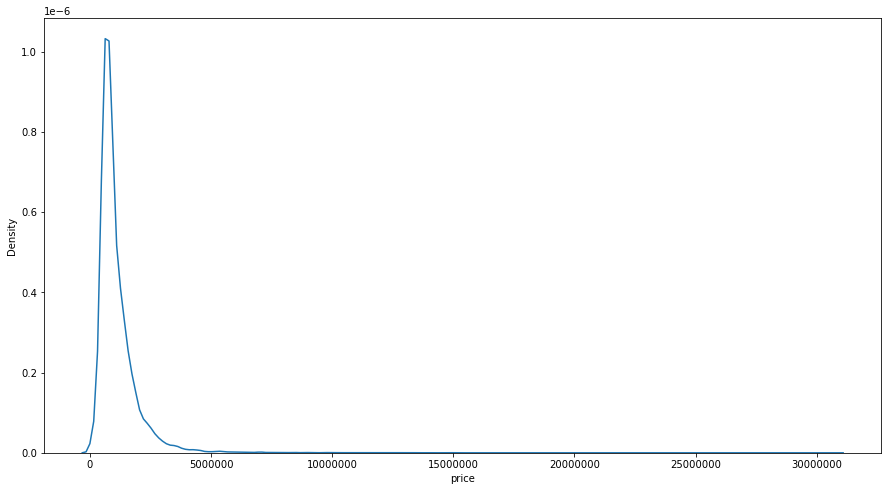

In [54]:
# distribution of price
fig, ax = plt.subplots(figsize=(15,8))

sns.kdeplot(data=df, x='price', ax=ax)
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

### Model 1

In [55]:
# Setting up simple linear regression
X = df['sqft_living']
y = df['price']

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

In [56]:
# summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.788e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:46:40   Log-Likelihood:            -4.3389e+05
No. Observations:               29149   AIC:                         8.678e+05
Df Residuals:                   29147   BIC:                         8.678e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.205e+04   9916.153     -9.283      0.000   -1.11e+05   -7.26e+04
sqft_living   565.4853      4.229    133.723      0.000     557.197     573.774
==============================================================================
Omnibus:                    42186.638   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49954609.033
Skew:                           8.236   Prob(JB):                         0.00
Kurtosis:                     205.136   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The distribution of price is skewed right so to try and improve our linear regression model we are going to transform the price values by using a logarithm and square root to normalize the distribution.

### Model 2

In [57]:
# Change y to the log of y to work around skewness
X = df['sqft_living']
y = np.log(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

<AxesSubplot:xlabel='price', ylabel='Density'>

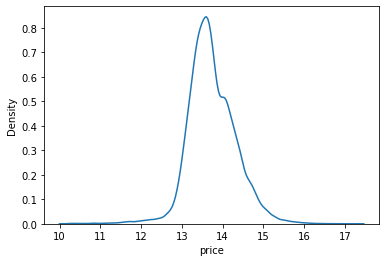

In [58]:
sns.kdeplot(data=y)

In [59]:
#summary
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:46:40   Log-Likelihood:                -18545.
No. Observations:               29149   AIC:                         3.709e+04
Df Residuals:                   29147   BIC:                         3.711e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9408      0.006   2013.231      0.000      12.928      12.953
sqft_living     0.0004   2.74e-06    136.548      0.000       0.000       0.000
==============================================================================
Omnibus:                     5812.232   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45556.724
Skew:                          -0.747   Prob(JB):                         0.00
Kurtosis:                       8.940   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3 - Baseline for Simple Linear Regression

In [60]:
# Change y to the square root of y to work around skewness
X = df['sqft_living']
y = np.sqrt(df['price'])

# model
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 2.285e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:46:40   Log-Likelihood:            -2.0107e+05
No. Observations:               29149   AIC:                         4.022e+05
Df Residuals:                   29147   BIC:                         4.022e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         542.3970      3.370    160.961      0.000     535.792     549.002
sqft_living     0.2172      0.001    151.161      0.000       0.214       0.220
==============================================================================
Omnibus:                    12389.359   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267145.120
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      17.510   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='price', ylabel='Density'>

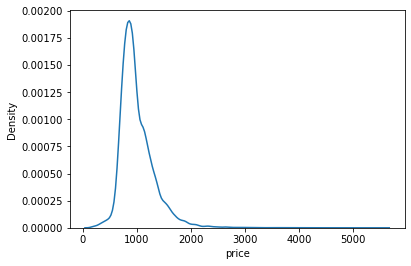

In [61]:
sns.kdeplot(data=y)

We achieved an R-squared of 0.439 in our square root of price model. This R-squared explains 43.9% of the variation of price. We are going to use this as our baseline model going forward.

## Multiple Linear Regression

In [62]:
# another look at our dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_renovated,address,lat,long,logged_price,grade_num,condition_num,view_num,yr_renovated_yes_or_no,zipcode
0,7399300360,2022-05-24,675000.00,4,1.00,1180,7140,1.00,0,NO,...,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19,13.42,7,4,1,0,98055
1,8910500230,2021-12-13,920000.00,5,2.50,2770,6703,1.00,0,NO,...,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,13.73,7,3,3,0,98133
2,1180000275,2021-09-29,311000.00,6,2.00,2880,6156,1.00,0,NO,...,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,12.65,7,3,3,0,98178
3,1604601802,2021-12-14,775000.00,3,3.00,2160,1400,2.00,0,NO,...,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,13.56,9,3,3,0,98118
4,8562780790,2021-08-24,592500.00,2,2.00,1120,758,2.00,0,NO,...,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,13.29,7,3,1,0,98027


In [63]:
# correlation to price
df.corr().price.sort_values()

id                       -0.03
condition_num            -0.01
yr_renovated_yes_or_no    0.04
long                      0.08
yr_renovated              0.09
sqft_lot                  0.09
yr_built                  0.11
floors                    0.20
waterfront                0.24
sqft_basement             0.25
sqft_garage               0.27
bedrooms                  0.29
lat                       0.30
sqft_patio                0.32
view_num                  0.32
bathrooms                 0.49
sqft_above                0.55
grade_num                 0.58
sqft_living               0.62
logged_price              0.83
price                     1.00
Name: price, dtype: float64

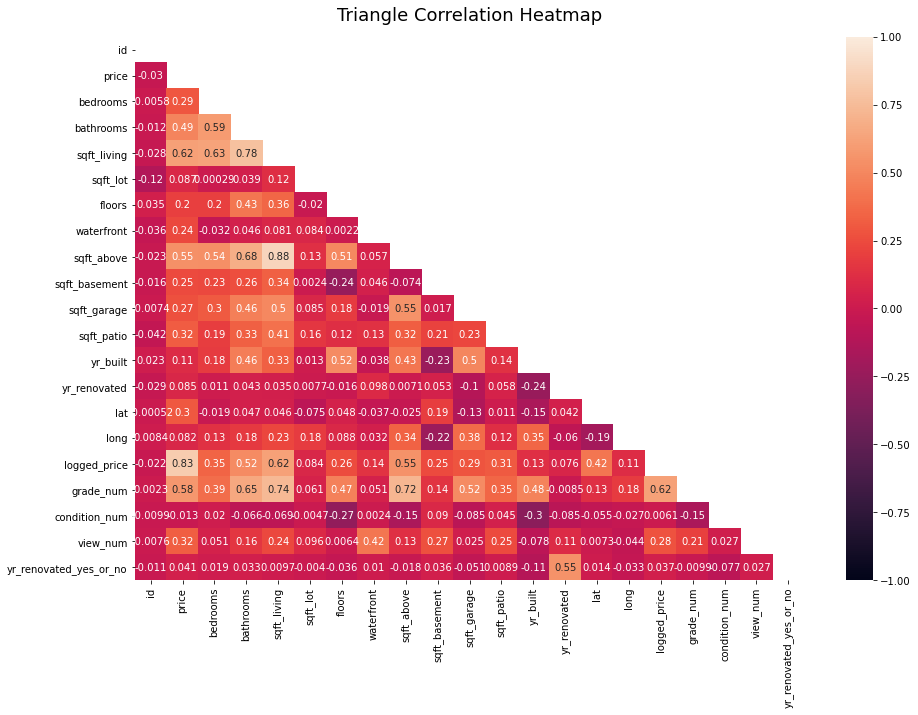

In [64]:
# correlation heat map
plt.figure(figsize=(15, 10))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Looking for multicollinearity.

sqft_above and sqft_living are highly correlated. For our regression we are going to use sqft_above. Bathrooms and bedrooms are both correlated to sqft_living. To work around this multicollinearity we are going to use sqft_above in our regression and use this variable along with bedrooms and bathrooms because they are not as correlated with each other.

### Model 1

In [65]:
# setting X and y variables
relevant_columns = ['sqft_living', 'bedrooms', 'bathrooms']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [66]:
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     8003.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:46:43   Log-Likelihood:            -2.0075e+05
No. Observations:               29149   AIC:                         4.015e+05
Df Residuals:                   29145   BIC:                         4.015e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         613.1682      5.227    117.314      0.000     602.924     623.413
sqft_living     0.2240      0.002     93.001      0.000       0.219       0.229
bedrooms      -45.8252      1.873    -24.465      0.000     -49.497     -42.154
bathrooms      31.0020      2.535     12.230      0.000      26.034      35.970
==============================================================================
Omnibus:                    11943.222   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           243979.060
Skew:                           1.473   Prob(JB):                         0.00
Kurtosis:                      16.864   Cond. No.                     9.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.45169942373829

This model did not achieve a much higher R-squared score. Now we are going to add some categorical variables starting with waterfront

### Model 2

In [68]:
# waterfront dummy variable
relevant_columns = ['sqft_living', 'bathrooms', 'waterfront']
X = df[relevant_columns]
y = np.sqrt(df['price'])

In [69]:
# model
model = sm.OLS(y, sm.add_constant(X)).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     8285.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:46:43   Log-Likelihood:            -2.0052e+05
No. Observations:               29149   AIC:                         4.011e+05
Df Residuals:                   29145   BIC:                         4.011e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         527.9432      3.860    136.759      0.000     520.377     535.510
sqft_living     0.1990      0.002     88.114      0.000       0.195       0.203
bathrooms      20.2474      2.460      8.229      0.000      15.425      25.070
waterfront    345.7063     10.565     32.721      0.000     324.998     366.415
==============================================================================
Omnibus:                     9907.120   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161421.166
Skew:                           1.199   Prob(JB):                         0.00
Kurtosis:                      14.276   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 3

In [70]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'waterfront', 'zipcode']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     983.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:46:44   Log-Likelihood:            -1.9082e+05
No. Observations:               29149   AIC:                         3.818e+05
Df Residuals:                   29071   BIC:                         3.824e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           415.2842      7.138     58.182      0.000     401.294     429.274
sqft_living       0.1727      0.001    153.619      0.000       0.170       0.175
waterfront      361.2234      7.733     46.711      0.000     346.066     376.381
zipcode_98002    -5.1894     11.160     -0.465      0.642     -27.064      16.685
zipcode_98003     7.4142     10.513      0.705      0.481     -13.192      28.020
zipcode_98004   810.8839     11.694     69.340      0.000     787.962     833.805
zipcode_98005   526.7962     14.381     36.632      0.000     498.609     554.983
zipcode_98006   414.1786     10.041     41.250      0.000     394.498     433.859
zipcode_98007   369.6978     15.194     24.332      0.000     339.917     399.479
zipcode_98008   398.8616     10.842     36.787      0.000     377.610     420.113
zipcode_98010    13.8435     11.703      1.183      0.237      -9.095      36.782
zipcode_98011   252.8772     12.453     20.307      0.000     228.469     277.285
zipcode_98014   130.0865     15.118      8.605      0.000     100.454     159.719
zipcode_98019   154.4711     12.734     12.130      0.000     129.511     179.431
zipcode_98022    35.0473     10.398      3.371      0.001      14.667      55.428
zipcode_98023    -3.1362      9.314     -0.337      0.736     -21.391      15.119
zipcode_98024   298.5736     17.208     17.351      0.000     264.845     332.302
zipcode_98027   283.5402     10.987     25.807      0.000     262.005     305.075
zipcode_98028   211.1932     11.291     18.705      0.000     189.063     233.324
zipcode_98029   365.3972     11.615     31.458      0.000     342.631     388.164
zipcode_98030    19.0749     11.016      1.732      0.083      -2.518      40.668
zipcode_98031    26.3946      9.977      2.646      0.008       6.840      45.949
zipcode_98032    17.3824     14.169      1.227      0.220     -10.389      45.153
zipcode_98033   531.7712      9.641     55.155      0.000     512.874     550.669
zipcode_98034   322.5341      9.334     34.556      0.000     304.240     340.828
zipcode_98038    74.4306      8.891      8.372      0.000      57.005      91.856
zipcode_98039  1114.7913     23.079     48.304      0.000    1069.556    1160.027
zipcode_98040   589.8234     11.383     51.816      0.000     567.512     612.135
zipcode_98042    21.5781      8.631      2.500      0.012       4.661      38.496
zipcode_98045   156.8534     10.350     15.155      0.000     136.567     177.140
zipcode_98047     4.7044     20.398      0.231      0.818     -35.277      44.685
zipcode_98050   318.7525    119.561      2.666      0.008      84.407     553.098
zipcode_98051    92.4545     21.857      4.230      0.000      49.613     135.296
zipcode_98052   403.1881      9.802     41.132      0.000     383.975     422.401
zipcode_98053   332.4619     10.899     30.503   

In [71]:
# this is to check for multicollinearity
vif = pd.DataFrame({'variables':X.columns[1:], 
                    'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
vif.sort_values(by="VIF")

,variables,VIF
74,zipcode_98224,1.00
29,zipcode_98050,1.00
75,zipcode_98288,1.00
28,zipcode_98047,1.01
65,zipcode_98148,1.01
...,...,...
21,zipcode_98033,1.16
42,zipcode_98075,1.16
23,zipcode_98038,1.17
5,zipcode_98006,1.17


### Model 4 - Standardized to See Condition Number Properly

In [72]:
# Using standardscaler to transform independent variables
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

In [73]:
# model after standardizing X
y = np.sqrt(df['price'])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     983.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:16   Log-Likelihood:            -1.9082e+05
No. Observations:               29149   AIC:                         3.818e+05
Df Residuals:                   29071   BIC:                         3.824e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1005.4661      0.989   1016.909      0.000    1003.528    1007.404
x1           168.6795      1.098    153.619      0.000     166.527     170.832
x2            47.2692      1.012     46.711      0.000      45.286      49.253
x3            -0.5755      1.238     -0.465      0.642      -3.001       1.850
x4             0.9040      1.282      0.705      0.481      -1.608       3.417
x5            84.7545      1.222     69.340      0.000      82.359      87.150
x6            41.0403      1.120     36.632      0.000      38.844      43.236
x7            55.1334      1.337     41.250      0.000      52.514      57.753
x8            26.8006      1.101     24.332      0.000      24.642      28.960
x9            46.2304      1.257     36.787      0.000      43.767      48.694
x10            1.4290      1.208      1.183      0.237      -0.939       3.797
x11           23.8213      1.173     20.307      0.000      21.522      26.121
x12            9.4911      1.103      8.605      0.000       7.329      11.653
x13           14.1022      1.163     12.130      0.000      11.823      16.381
x14            4.3538      1.292      3.371      0.001       1.822       6.886
x15           -0.4785      1.421     -0.337      0.736      -3.263       2.307
x16           18.6355      1.074     17.351      0.000      16.530      20.741
x17           32.2456      1.249     25.807      0.000      29.797      34.695
x18           22.9702      1.228     18.705      0.000      20.563      25.377
x19           38.1330      1.212     31.458      0.000      35.757      40.509
x20            2.1552      1.245      1.732      0.083      -0.284       4.595
x21            3.5266      1.333      2.646      0.008       0.914       6.139
x22            1.3767      1.122      1.227      0.220      -0.823       3.576
x23           75.9954      1.378     55.155      0.000      73.295      78.696
x24           48.9981      1.418     34.556      0.000      46.219      51.777
x25           12.5733      1.502      8.372      0.000       9.630      15.517
x26           50.1035      1.037     48.304      0.000      48.070      52.137
x27           64.1516      1.238     51.816      0.000      61.725      66.578
x28            3.9124      1.565      2.500      0.012       0.845       6.980
x29           19.6732      1.298     15.155      0.000      17.129      22.218
x30            0.2415      1.047      0.231      0.818      -1.811       2.294
x31            2.6402      0.990      2.666      0.008       0.699       4.581
x32            4.3944      1.039      4.230      0.000       2.358       6.431
x33           55.7310      1.355     41.132      0.000      53.075      58.387
x34           38.3423      1.257     30.503      0.000      35.879      40.806
x35            4.6590      1.145      4.070      0.000       2.416       6.902
x3

After standardizing our independent variables we double check our Condition Number to see if there is multicollinearity. Our new Condition Number is 8 which shows that there is very little multicollinearity in our model.

### Model 5

In [74]:
# modeling using grade as a dummy variable
X = df[['sqft_living', 'waterfront', 'grade']]
X = pd.get_dummies(X, columns=["grade"], drop_first=True)
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2484.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:16   Log-Likelihood:            -1.9864e+05
No. Observations:               29149   AIC:                         3.973e+05
Df Residuals:                   29135   BIC:                         3.974e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1029.2495      9.615    107.044      0.000    1010.403    1048.096
sqft_living             0.1207      0.002     59.943      0.000       0.117       0.125
waterfront            317.2696      9.977     31.799      0.000     297.714     336.825
grade_11 Excellent    202.1748     12.667     15.961      0.000     177.347     227.003
grade_12 Luxury       380.9928     21.267     17.915      0.000     339.309     422.677
grade_13 Mansion      506.0037     46.287     10.932      0.000     415.278     596.729
grade_2 Substandard  -488.4937    220.679     -2.214      0.027    -921.034     -55.954
grade_3 Poor         -500.2269     74.017     -6.758      0.000    -645.303    -355.151
grade_4 Low          -426.6699     33.694    -12.663      0.000    -492.711    -360.629
grade_5 Fair         -408.9781     13.961    -29.294      0.000    -436.342    -381.614
grade_6 Low Average  -400.8656      8.880    -45.143      0.000    -418.271    -383.461
grade_7 Average      -354.9281      7.517    -47.218      0.000    -369.661    -340.195
grade_8 Good         -286.6616      7.098    -40.388      0.000    -300.574    -272.750
grade_9 Better       -150.5206      7.230    -20.820      0.000    -164.691    -136.350
==============================================================================
Omnibus:                    10072.164   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           173419.980
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                      14.702   Cond. No.                     4.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 6

In [75]:
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     952.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:16   Log-Likelihood:            -1.8973e+05
No. Observations:               29149   AIC:                         3.796e+05
Df Residuals:                   29060   BIC:                         3.804e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 679.9048      9.958     68.278      0.000     660.387     699.423
sqft_living             0.1258      0.002     81.860      0.000       0.123       0.129
waterfront            339.3029      7.502     45.226      0.000     324.598     354.008
zipcode_98002          -8.4509     10.777     -0.784      0.433     -29.575      12.673
zipcode_98003           2.3982     10.137      0.237      0.813     -17.471      22.267
zipcode_98004         758.0804     11.346     66.814      0.000     735.841     780.319
zipcode_98005         487.8725     13.887     35.133      0.000     460.654     515.091
zipcode_98006         370.6134      9.729     38.093      0.000     351.544     389.683
zipcode_98007         356.5791     14.650     24.340      0.000     327.864     385.294
zipcode_98008         388.8399     10.454     37.194      0.000     368.349     409.331
zipcode_98010          17.9959     11.300      1.593      0.111      -4.152      40.144
zipcode_98011         247.0572     12.007     20.576      0.000     223.523     270.592
zipcode_98014         121.8694     14.571      8.364      0.000      93.310     150.428
zipcode_98019         142.5140     12.282     11.603      0.000     118.441     166.587
zipcode_98022          29.6362     10.023      2.957      0.003       9.991      49.281
zipcode_98023         -16.4363      8.986     -1.829      0.067     -34.050       1.177
zipcode_98024         280.7962     16.594     16.921      0.000     248.271     313.322
zipcode_98027         257.9664     10.616     24.299      0.000     237.158     278.775
zipcode_98028         209.9366     10.886     19.285      0.000     188.599     231.274
zipcode_98029         320.7757     11.259     28.492      0.000     298.708     342.843
zipcode_98030          15.4413     10.617      1.454      0.146      -5.368      36.250
zipcode_98031          23.9694      9.620      2.492      0.013       5.114      42.825
zipcode_98032          13.0630     13.664      0.956      0.339     -13.719      39.845
zipcode_98033         500.9329      9.324     53.726      0.000     482.658     519.208
zipcode_98034         317.9504      9.006     35.303      0.000     300.297     335.603
zipcode_98038          71.1629      8.570      8.304      0.000      54.365      87.960
zipcode_98039        1045.0808     22.321     46.821      0.000    1001.331    1088.831
zipcode_98040         531.9493     11.059     48.102      0.000     510.274     553.625
zipcode_98042          18.0134      8.322      2.165      0.030       1.703      34.324
zipcode_98045         145.2161      9.987     14.540      0.000     125.640     164.792
zipcode_98047           3.6675     19.664      0.187      0.852     -34.876      42.211
zipcode_98050         317.7815    115.214      2.758      0.006      91.958     543.605
zip

In [76]:
y_pred = model.predict(sm.add_constant(X))


print(mean_absolute_error(y, y_pred))
print(mean_squared_error(y, y_pred, squared=False))


103.10748183319005
162.3991551236614


### Model 7

In [77]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'waterfront', 'zipcode', 'yr_renovated_yes_or_no']]
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     973.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:17   Log-Likelihood:            -1.9079e+05
No. Observations:               29149   AIC:                         3.817e+05
Df Residuals:                   29070   BIC:                         3.824e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    415.2964      7.130     58.245      0.000     401.321     429.272
sqft_living                0.1725      0.001    153.621      0.000       0.170       0.175
waterfront               360.6635      7.725     46.686      0.000     345.522     375.805
yr_renovated_yes_or_no    65.3566      8.268      7.904      0.000      49.150      81.563
zipcode_98002             -6.3957     11.149     -0.574      0.566     -28.249      15.458
zipcode_98003              7.1129     10.502      0.677      0.498     -13.472      27.697
zipcode_98004            809.4066     11.684     69.278      0.000     786.506     832.307
zipcode_98005            526.4962     14.366     36.649      0.000     498.339     554.654
zipcode_98006            413.1305     10.031     41.185      0.000     393.469     432.792
zipcode_98007            368.3283     15.179     24.266      0.000     338.577     398.080
zipcode_98008            397.8899     10.832     36.734      0.000     376.659     419.120
zipcode_98010             14.0588     11.691      1.203      0.229      -8.855      36.973
zipcode_98011            252.2355     12.440     20.276      0.000     227.853     276.618
zipcode_98014            129.6208     15.103      8.583      0.000     100.019     159.223
zipcode_98019            154.8235     12.721     12.171      0.000     129.890     179.757
zipcode_98022             34.1962     10.388      3.292      0.001      13.836      54.556
zipcode_98023             -3.4752      9.304     -0.374      0.709     -21.711      14.761
zipcode_98024            298.9903     17.190     17.393      0.000     265.297     332.684
zipcode_98027            283.2480     10.975     25.808      0.000     261.736     304.760
zipcode_98028            210.9752     11.279     18.705      0.000     188.868     233.082
zipcode_98029            365.7815     11.603     31.524      0.000     343.039     388.524
zipcode_98030             18.8614     11.005      1.714      0.087      -2.709      40.431
zipcode_98031             26.3219      9.966      2.641      0.008       6.788      45.856
zipcode_98032             17.3100     14.154      1.223      0.221     -10.432      45.052
zipcode_98033            530.2215      9.633     55.041      0.000     511.340     549.103
zipcode_98034            322.3804      9.324     34.576      0.000     304.105     340.655
zipcode_98038             74.3981      8.881      8.377      0.000      56.991      91.806
zipcode_98039           1115.4178     23.055     48.382      0.000    1070.230    1160.606
zipcode_98040            589.4308     11.371     51.836      0.000     567.143     611.719
zipcode_98042             21.3067      8.622      2.471      0.013       4.407      38.206
zipcode_98045            156.5427     10.339     15.141      0.000     136.278  

### Model 8

In [78]:
# modeling using zipcode as a dummy variable
X = df[['sqft_living', 'yr_renovated_yes_or_no']]
y = np.sqrt(df["price"])

#This is just the chart of the graph after dummied, add more variables into X for more variables
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:17   Log-Likelihood:            -2.0104e+05
No. Observations:               29149   AIC:                         4.021e+05
Df Residuals:                   29146   BIC:                         4.021e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    541.2650      3.369    160.659      0.000     534.661     547.868
sqft_living                0.2171      0.001    151.240      0.000       0.214       0.220
yr_renovated_yes_or_no    93.9212     11.699      8.028      0.000      70.990     116.852
==============================================================================
Omnibus:                    12351.562   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264672.879
Skew:                           1.529   Prob(JB):                         0.00
Kurtosis:                      17.442   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Taking a look at outliers in prices

<AxesSubplot:xlabel='price', ylabel='Density'>

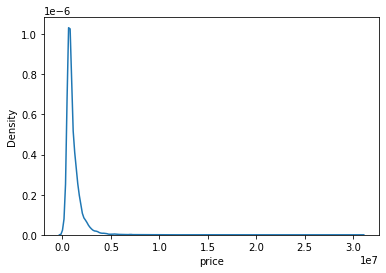

In [79]:
# price distribution
sns.kdeplot(data=df['price'])

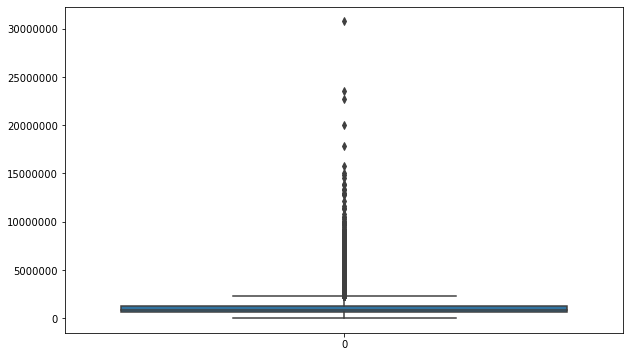

In [80]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(data=df['price'], ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [81]:
print(df['price'].mean())
print(df['price'].median())

1113428.9581117705
869000.0


Running our model on our dataframe filtered to prices less than 5,000,000

### Model 9

In [82]:
# setting X and y values
df1 = df[(df.price) < 5000000]

# modeling using zipcode waterfront, and grade as dummy variables
X = df1[['sqft_living', 'waterfront', 'zipcode', 'grade']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df1["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     933.9
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:18   Log-Likelihood:            -1.8519e+05
No. Observations:               28946   AIC:                         3.706e+05
Df Residuals:                   28857   BIC:                         3.713e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 694.5515      8.970     77.428      0.000     676.969     712.134
sqft_living             0.1222      0.001     87.318      0.000       0.119       0.125
waterfront            214.7140      7.294     29.438      0.000     200.418     229.010
zipcode_98002         -10.0425      9.644     -1.041      0.298     -28.945       8.860
zipcode_98003          -7.5387      9.083     -0.830      0.407     -25.342      10.265
zipcode_98004         663.4782     10.866     61.058      0.000     642.180     684.777
zipcode_98005         495.1028     12.455     39.751      0.000     470.690     519.516
zipcode_98006         374.0794      8.744     42.780      0.000     356.940     391.219
zipcode_98007         353.8917     13.110     26.995      0.000     328.197     379.587
zipcode_98008         386.5960      9.376     41.232      0.000     368.218     404.974
zipcode_98010          25.1312     10.113      2.485      0.013       5.310      44.952
zipcode_98011         246.1720     10.744     22.912      0.000     225.113     267.231
zipcode_98014         129.5919     13.039      9.939      0.000     104.035     155.149
zipcode_98019         141.6857     10.990     12.892      0.000     120.144     163.227
zipcode_98022          28.7096      8.969      3.201      0.001      11.130      46.289
zipcode_98023         -15.3178      8.041     -1.905      0.057     -31.079       0.443
zipcode_98024         212.6657     15.312     13.889      0.000     182.653     242.678
zipcode_98027         254.0003      9.523     26.672      0.000     235.334     272.666
zipcode_98028         208.4640      9.741     21.400      0.000     189.371     227.557
zipcode_98029         317.2396     10.105     31.394      0.000     297.433     337.046
zipcode_98030          12.8820      9.500      1.356      0.175      -5.739      31.503
zipcode_98031          21.0277      8.608      2.443      0.015       4.155      37.900
zipcode_98032          14.2891     12.227      1.169      0.243      -9.677      38.255
zipcode_98033         492.5413      8.368     58.860      0.000     476.140     508.943
zipcode_98034         308.9816      8.077     38.256      0.000     293.151     324.812
zipcode_98038          72.7289      7.669      9.484      0.000      57.698      87.760
zipcode_98039         909.9639     25.312     35.951      0.000     860.352     959.576
zipcode_98040         499.8557     10.121     49.386      0.000     480.017     519.694
zipcode_98042          16.4188      7.446      2.205      0.027       1.823      31.014
zipcode_98045         149.5003      8.937     16.727      0.000     131.982     167.018
zipcode_98047           0.0692     17.596      0.004      0.997     -34.421      34.559
zipcode_98050         319.7484    103.096      3.101      0.002     117.675     521.822
zip

### Model 10

In [83]:
# adding year_built and renovated to model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_renovated_yes_or_no']]
X = pd.get_dummies(X, columns=["zipcode",'grade'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     946.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:18   Log-Likelihood:            -1.8968e+05
No. Observations:               29149   AIC:                         3.795e+05
Df Residuals:                   29059   BIC:                         3.803e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    681.8608      9.944     68.568      0.000     662.370     701.352
sqft_living                0.1253      0.002     81.627      0.000       0.122       0.128
waterfront               338.5148      7.491     45.190      0.000     323.832     353.197
yr_renovated_yes_or_no    76.8780      7.967      9.649      0.000      61.261      92.494
zipcode_98002             -9.8688     10.761     -0.917      0.359     -30.961      11.224
zipcode_98003              2.0138     10.121      0.199      0.842     -17.824      21.851
zipcode_98004            756.0018     11.330     66.724      0.000     733.794     778.210
zipcode_98005            487.2808     13.865     35.145      0.000     460.105     514.456
zipcode_98006            369.0681      9.715     37.989      0.000     350.026     388.110
zipcode_98007            354.8763     14.628     24.260      0.000     326.205     383.548
zipcode_98008            387.6188     10.439     37.133      0.000     367.159     408.079
zipcode_98010             18.1985     11.282      1.613      0.107      -3.915      40.312
zipcode_98011            246.2670     11.988     20.542      0.000     222.769     269.765
zipcode_98014            121.2900     14.548      8.337      0.000      92.776     149.804
zipcode_98019            142.8544     12.263     11.650      0.000     118.819     166.890
zipcode_98022             28.6049     10.008      2.858      0.004       8.990      48.220
zipcode_98023            -16.9508      8.972     -1.889      0.059     -34.537       0.635
zipcode_98024            281.2115     16.568     16.973      0.000     248.737     313.686
zipcode_98027            257.4044     10.600     24.284      0.000     236.629     278.180
zipcode_98028            209.6500     10.869     19.289      0.000     188.346     230.953
zipcode_98029            320.9060     11.241     28.548      0.000     298.873     342.939
zipcode_98030             15.1609     10.600      1.430      0.153      -5.615      35.937
zipcode_98031             23.8796      9.605      2.486      0.013       5.054      42.705
zipcode_98032             12.9457     13.642      0.949      0.343     -13.794      39.686
zipcode_98033            498.9202      9.312     53.581      0.000     480.669     517.171
zipcode_98034            317.7683      8.992     35.338      0.000     300.143     335.393
zipcode_98038             71.0924      8.556      8.309      0.000      54.321      87.863
zipcode_98039           1045.4741     22.286     46.913      0.000    1001.793    1089.155
zipcode_98040            531.0944     11.042     48.100      0.000     509.452     552.736
zipcode_98042             17.6560      8.308      2.125      0.034       1.371      33.941
zipcode_98045            144.7639      9.972     14.517      0.000     125.219  

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 30154
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      29149 non-null  int64         
 1   date                    29149 non-null  datetime64[ns]
 2   price                   29149 non-null  float64       
 3   bedrooms                29149 non-null  int64         
 4   bathrooms               29149 non-null  float64       
 5   sqft_living             29149 non-null  int64         
 6   sqft_lot                29149 non-null  int64         
 7   floors                  29149 non-null  float64       
 8   waterfront              29149 non-null  int64         
 9   greenbelt               29149 non-null  object        
 10  nuisance                29149 non-null  object        
 11  view                    29149 non-null  object        
 12  condition               29149 non-null  object

### Model 11

In [85]:
# adding year_built and renovated to model
# setting X and y values
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'yr_renovated_yes_or_no',
       'yr_built', 'sqft_patio', 'sqft_basement', 'condition','view',
       'bathrooms', 'floors']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'condition', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     891.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:18   Log-Likelihood:            -1.8884e+05
No. Observations:               29149   AIC:                         3.779e+05
Df Residuals:                   29046   BIC:                         3.787e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1232.5493     96.359     12.791      0.000    1043.680    1421.418
sqft_living                0.1182      0.002     57.274      0.000       0.114       0.122
waterfront               199.0636      8.550     23.282      0.000     182.305     215.822
yr_renovated_yes_or_no    73.5144      7.916      9.287      0.000      57.999      89.030
yr_built                  -0.2554      0.048     -5.271      0.000      -0.350      -0.160
sqft_patio                 0.0240      0.004      5.600      0.000       0.016       0.032
sqft_basement             -0.0284      0.002    -12.909      0.000      -0.033      -0.024
bathrooms                 15.2236      1.855      8.205      0.000      11.587      18.860
floors                   -18.8582      2.581     -7.307      0.000     -23.917     -13.800
zipcode_98002            -16.2130     10.480     -1.547      0.122     -36.754       4.328
zipcode_98003             -8.9186      9.855     -0.905      0.365     -28.235      10.398
zipcode_98004            751.0665     11.060     67.906      0.000     729.388     772.745
zipcode_98005            464.2592     13.549     34.264      0.000     437.702     490.816
zipcode_98006            350.5582      9.507     36.872      0.000     331.923     369.193
zipcode_98007            349.1458     14.246     24.509      0.000     321.224     377.068
zipcode_98008            365.1792     10.206     35.782      0.000     345.176     385.183
zipcode_98010             22.7819     10.990      2.073      0.038       1.241      44.323
zipcode_98011            251.7847     11.661     21.593      0.000     228.929     274.640
zipcode_98014            125.7723     14.146      8.891      0.000      98.045     153.499
zipcode_98019            152.3443     11.922     12.778      0.000     128.976     175.713
zipcode_98022              5.9573      9.768      0.610      0.542     -13.188      25.102
zipcode_98023            -22.1371      8.742     -2.532      0.011     -39.271      -5.003
zipcode_98024            275.1245     16.142     17.044      0.000     243.486     306.763
zipcode_98027            250.2252     10.334     24.214      0.000     229.970     270.480
zipcode_98028            213.8220     10.580     20.210      0.000     193.085     234.559
zipcode_98029            327.0534     10.939     29.897      0.000     305.612     348.495
zipcode_98030             11.0465     10.311      1.071      0.284      -9.164      31.257
zipcode_98031             23.3007      9.340      2.495      0.013       4.993      41.608
zipcode_98032             10.1671     13.280      0.766      0.444     -15.863      36.197
zipcode_98033            498.6402      9.067     54.996      0.000     480.869     516.412
zipcode_98034            312.4955      8.759     35.677      0.000     295.328  

### Model 12 - Final Model Before Train-Test Split

In [86]:
# modeling using zipcode waterfront, and grade as dummy variables
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     954.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:47:19   Log-Likelihood:            -1.8922e+05
No. Observations:               29149   AIC:                         3.786e+05
Df Residuals:                   29056   BIC:                         3.794e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 727.9857     10.582     68.794      0.000     707.244     748.727
sqft_living             0.1205      0.002     79.103      0.000       0.117       0.123
waterfront            201.6571      8.638     23.345      0.000     184.726     218.588
zipcode_98002          -7.8749     10.592     -0.743      0.457     -28.636      12.886
zipcode_98003          -3.1276      9.968     -0.314      0.754     -22.665      16.410
zipcode_98004         757.8602     11.156     67.935      0.000     735.995     779.726
zipcode_98005         484.6668     13.649     35.509      0.000     457.914     511.420
zipcode_98006         360.7255      9.567     37.705      0.000     341.973     379.477
zipcode_98007         360.9975     14.399     25.070      0.000     332.774     389.221
zipcode_98008         378.2348     10.281     36.789      0.000     358.083     398.386
zipcode_98010          18.5836     11.108      1.673      0.094      -3.188      40.355
zipcode_98011         250.0930     11.801     21.193      0.000     226.963     273.223
zipcode_98014         125.3538     14.323      8.752      0.000      97.281     153.427
zipcode_98019         145.1931     12.071     12.028      0.000     121.533     168.853
zipcode_98022          14.6302      9.886      1.480      0.139      -4.747      34.007
zipcode_98023         -16.4385      8.834     -1.861      0.063     -33.753       0.876
zipcode_98024         287.9194     16.316     17.647      0.000     255.940     319.899
zipcode_98027         257.1441     10.435     24.643      0.000     236.692     277.596
zipcode_98028         208.6154     10.700     19.497      0.000     187.643     229.588
zipcode_98029         321.3285     11.065     29.039      0.000     299.640     343.017
zipcode_98030          15.9906     10.434      1.533      0.125      -4.460      36.442
zipcode_98031          25.2664      9.454      2.672      0.008       6.735      43.797
zipcode_98032          13.5719     13.429      1.011      0.312     -12.750      39.894
zipcode_98033         502.3322      9.165     54.809      0.000     484.368     520.296
zipcode_98034         313.9377      8.853     35.462      0.000     296.586     331.290
zipcode_98038          74.4701      8.423      8.841      0.000      57.960      90.980
zipcode_98039        1038.3588     21.939     47.330      0.000     995.358    1081.359
zipcode_98040         522.4565     10.892     47.965      0.000     501.107     543.806
zipcode_98042          19.2991      8.179      2.360      0.018       3.268      35.330
zipcode_98045         146.7678      9.822     14.943      0.000     127.516     166.019
zipcode_98047           2.9911     19.326      0.155      0.877     -34.889      40.872
zipcode_98050         286.2534    113.264      2.527      0.011      64.251     508.256
zip

In [87]:
model.params.index

Index(['const', 'sqft_living', 'waterfront', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98047', 'zipcode_98050', 'zipcode_98051',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98057', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109

In [88]:
# Performance Metrics
y_pred = model.predict(sm.add_constant(X))

print(mean_absolute_error(y, y_pred) ** 2)
print(mean_squared_error(y, y_pred, squared=True))

10250.275511166976
25470.25490983852


TypeError: 'RegressionResultsWrapper' object is not callable

## Train-Test Split

We are going to use our Model 12 to do Train-Test Split on the data

In [89]:
# defining X and y
X = df[['sqft_living', 'waterfront', 'zipcode', 'grade', 'view']]
X = pd.get_dummies(X, columns=["zipcode",'grade', 'view'], drop_first=True)
y = np.sqrt(df["price"])

In [90]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
# set up Linear Regression
lr = LinearRegression()

In [92]:
# fit model
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
# metrics
y_pred = lr.predict(X_train)

print(lr.score(X_train, y_train))
print(mean_absolute_error(y_train, y_pred) ** 2)
print(mean_squared_error(y_train, y_pred, squared=True))

0.7471808609324955
10373.825593584523
26335.734217051955


Our training model MAE is about 10,307 dollars which means are margin of error for predicting a house is 10,307 dollars in either direction. Our RMSE is 26,239 dollars.

Now to predict on our X_test and evaluate based on y_test

In [94]:
# metrics
y_pred = lr.predict(X_test)

print(mean_absolute_error(y_test, y_pred) ** 2)
print(mean_squared_error(y_test, y_pred, squared=True))

10123.776553579155
23639.64566019073


Our test showed a slight increase in MAE and a decrease in our RMSE.

### Grouping Zipcodes

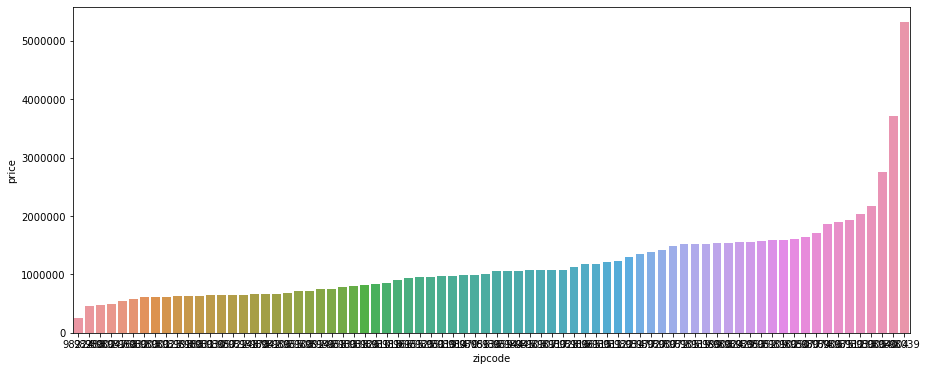

In [138]:
# top 10 zipcodes by average price
zipcode_price = df[['price','zipcode']].groupby(by='zipcode').mean().reset_index().sort_values(by='price')\


fig, ax = plt.subplots(figsize=(15,6))

sns.barplot(data=zipcode_price, x='zipcode', y='price', ax=ax)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

In [174]:
price_time = pd.DataFrame(df.groupby('date')['price'].sum())

In [175]:
price_time['month']=price_time.index.month

In [176]:
price_month = pd.DataFrame(price_time.groupby('month')['price'].sum())

In [177]:
price_month.reset_index().month.map(month_labels)

0      Jan
1      Feb
2      Mar
3      Apr
4      May
5     June
6     July
7      Aug
8     Sept
9      Oct
10     Nov
11     Dec
Name: month, dtype: object

In [281]:
df.price.sum()

32455340700.0

In [178]:
price_month['price'].apply(lambda x: x/10**6).sort_values(ascending=True)

month
1    1171.93
2    1772.24
12   2043.06
11   2587.83
10   2854.32
6    2873.52
9    3008.43
5    3051.13
3    3105.94
4    3147.78
8    3340.50
7    3498.67
Name: price, dtype: float64

In [179]:
price_month.keys()

Index(['price'], dtype='object')

In [180]:
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
                9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


In [181]:
price_month = price_month.reset_index()

In [182]:
price_month

,month,price
0,1,1171926178.00
1,2,1772236843.00
2,3,3105937870.00
3,4,3147775716.00
4,5,3051134596.00
5,6,2873524023.00
6,7,3498668931.00
7,8,3340495540.00
8,9,3008430290.00
9,10,2854316510.00


In [183]:
price_month['month_name'] = price_month.month.map(month_labels)

In [185]:
price_month

,month,price,month_name
0,1,1171926178.00,Jan
1,2,1772236843.00,Feb
2,3,3105937870.00,Mar
3,4,3147775716.00,Apr
4,5,3051134596.00,May
5,6,2873524023.00,June
6,7,3498668931.00,July
7,8,3340495540.00,Aug
8,9,3008430290.00,Sept
9,10,2854316510.00,Oct


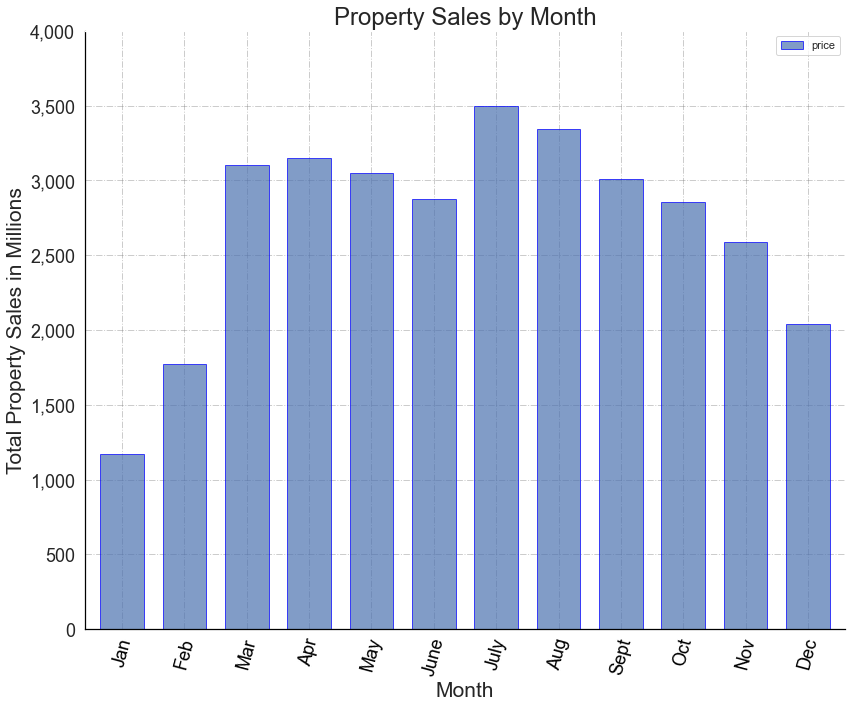

<Figure size 864x576 with 0 Axes>

In [282]:
#define the figure
fig,ax = plt.subplots()

# use a white background and other settings 
plt.rcParams['axes.facecolor'] = 'white'
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='x', colors='black', pad =.2)
ax.grid(color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# plot data in price_month
price_month.plot(kind='bar',x='month_name',y='price', figsize=(12,10), width = .7, alpha = .7, edgecolor = 'blue', ax=ax)
    
# labelling around the graph
plt.xlabel('Month', fontsize = 21)
plt.ylabel('Total Property Sales in Millions', fontsize = 21)
plt.xticks(rotation=75,fontsize=18)
plt.yticks(fontsize=18)
ax.set_facecolor('white')
plt.title('Property Sales by Month', fontsize = 24, loc ='center')
y_tick_labels = ['{:,.0f}'.format(x) for x in ax.get_yticks()/1000000]
ax.set_yticks(ax.get_yticks().tolist())
ax.set_yticklabels(y_tick_labels)
plt.tight_layout()
plt.show()
plt.savefig('./data/' + '{property_sales}.png', bbox_inches='tight');

In [203]:
df.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long', 'logged_price', 'grade_num',
       'condition_num', 'view_num', 'yr_renovated_yes_or_no', 'zipcode'],
      dtype='object')

Text(0.5, 1.0, 'Mean Price of Real Estate by Zipcodes')

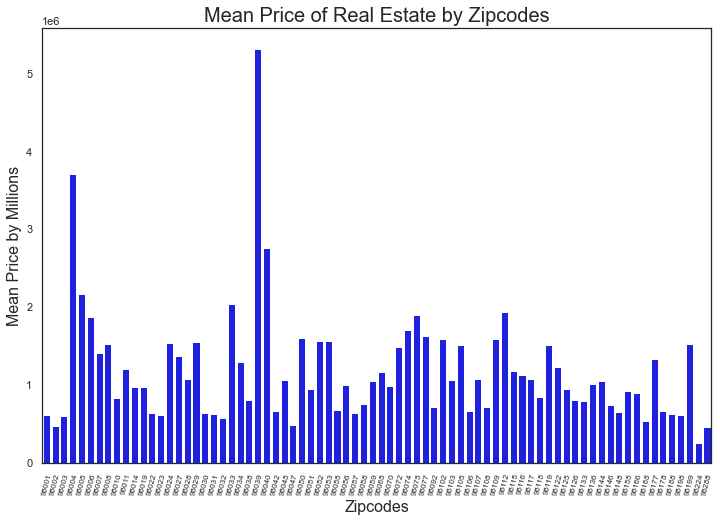

In [223]:
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
ax = sns.barplot(x=df.groupby('zipcode')['price'].mean().index, y=df.groupby('zipcode')['price'].mean(),  data=df,color='blue')
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=75,fontsize=8)
ax.set_ylabel('Mean Price by Millions',fontsize = 16)
ax.set_xlabel('Zipcodes',fontsize = 16)
ax.set_title('Mean Price of Real Estate by Zipcodes',fontsize = 20)
#plt.savefig('./viz_images/' + 'ROI_mean_by_month.png', bbox_inches='tight');

Text(0.5, 1.0, 'Mean Price of Real Estate by House Grade')

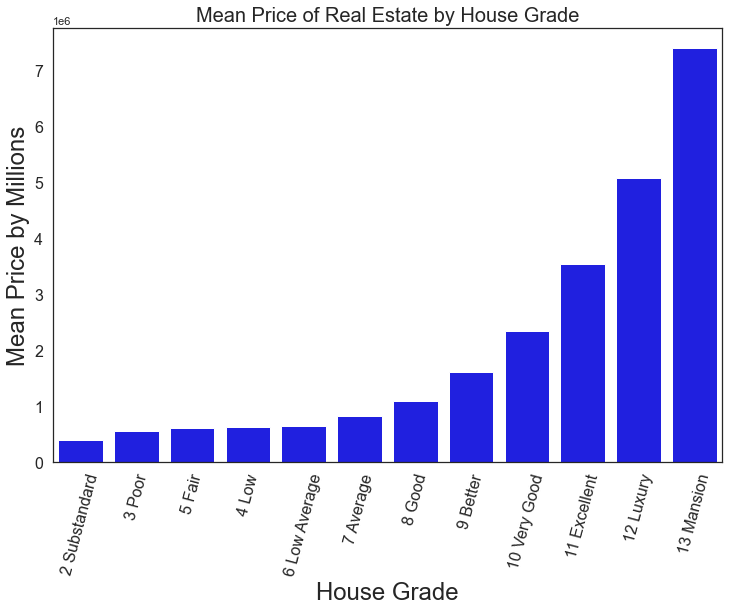

In [261]:
#set seaborn plotting aesthetics
sns.set(style='white')
dff = df.groupby('grade')['price'].mean().reset_index().sort_values('price')
#create grouped bar chart
ax = sns.barplot(x=dff.grade, y=dff.price,  data=df,color='blue')
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel('Mean Price by Millions',fontsize = 24)
ax.set_xlabel('House Grade',fontsize = 24)
ax.set_title('Mean Price of Real Estate by House Grade',fontsize = 20)
#plt.savefig('./viz_images/' + 'ROI_mean_by_month.png', bbox_inches='tight');

Text(0.5, 1.0, 'Mean Price of Real Estate by View')

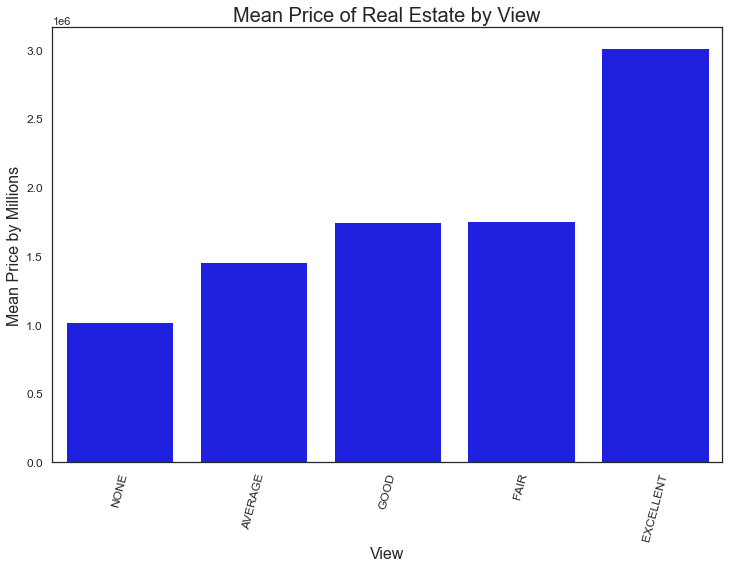

In [262]:
#set seaborn plotting aesthetics
sns.set(style='white')
dff = df.groupby('view')['price'].mean().reset_index().sort_values('price')
#create grouped bar chart
ax = sns.barplot(x=dff.view, y=dff.price,  data=df,color='blue')
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=75,fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Mean Price by Millions',fontsize = 16)
ax.set_xlabel('View',fontsize = 16)
ax.set_title('Mean Price of Real Estate by View',fontsize = 20)
#plt.savefig('./viz_images/' + 'ROI_mean_by_month.png', bbox_inches='tight');

In [257]:
df.groupby('view')['price'].mean().reset_index().sort_values('price')

,view,price
4,NONE,1020630.23
0,AVERAGE,1458998.87
3,GOOD,1745637.99
2,FAIR,1753582.40
1,EXCELLENT,3011752.06


In [260]:
df.groupby('view')['price'].mean()

view
AVERAGE     1458998.87
EXCELLENT   3011752.06
FAIR        1753582.40
GOOD        1745637.99
NONE        1020630.23
Name: price, dtype: float64

In [248]:
df.groupby('grade')['price'].mean().reset_index()

,grade,price
0,10 Very Good,2342473.86
1,11 Excellent,3546012.37
2,12 Luxury,5088028.59
3,13 Mansion,7399047.88
4,2 Substandard,400000.00
5,3 Poor,552444.44
6,4 Low,634436.76
7,5 Fair,617560.31
8,6 Low Average,654633.60
9,7 Average,822665.34


In [212]:
test = df.groupby('zipcode')['price'].mean()

In [215]:
test

zipcode
98001    616692.34
98002    475426.22
98003    606754.71
98004   3706461.83
98005   2166382.24
           ...    
98188    629437.55
98198    621724.14
98199   1528086.36
98224    254666.67
98288    457268.75
Name: price, Length: 76, dtype: float64